# Applied Neural Networks Homework 1
Leslie Kerby

# **MNIST Digits and Keras**</br>
Import in the MNIST digits dataset (70,000 images, each 28x28 pixels). Preprocess the data as necessary. The training set should have 60k images and the test set 10k. Also create a validation set within the training set -- using 10% of the training data.

**Part 1** </br>
Using the Keras Sequential API, create a neural network with two hidden layers of 500 neurons each. Train it for 30 epochs. Graph the accuracy and loss for the training and validation sets. Does your model become overfit? If so, at about what epoch? Re-train your neural network for that number of epochs.

Now test your neural network on your testing data. What accuracy do you achieve? Is it about the same as the accuracy on the validation data?

Plot several of the misclassified images from your model.

**Part 2** </br>
Try to improve your model by changing your architecture (try different numbers of neurons per layer, and/or more layers) and report again on accuracies and plot several misclassified images.

**Part 3** </br>
Which model did best? Discuss.

# **Answer**


### **Part 1**

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

np.random.seed(36)
tf.random.set_seed(36)

In [2]:
# Load the data
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [3]:
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1)

# free some space
del train

In [4]:
# Check the data
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [5]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [6]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

In [7]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [8]:
np.shape(X_train)

(42000, 28, 28, 1)

In [9]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

In [10]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=42)

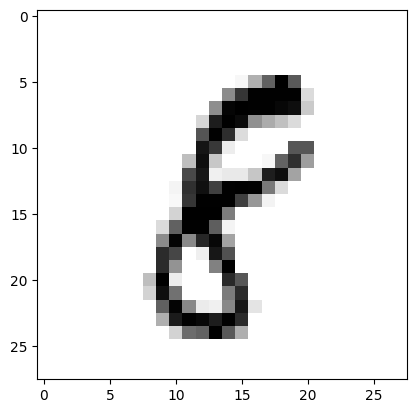

In [11]:
# Some examples
g = plt.imshow(X_train[0][:,:,0], cmap='binary')

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

# Create the model
model = Sequential()

# Add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) # 10 for the number of classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
print(np.shape(X_train))
print(np.shape(Y_train))
print(np.shape(X_val))

print(np.shape(Y_val))

(37800, 28, 28, 1)
(37800, 10)
(4200, 28, 28, 1)
(4200, 10)


In [14]:
history = model.fit(X_train, Y_train, epochs=30, batch_size=28,
                    validation_data=(X_val, Y_val))

Epoch 1/30


ValueError: in user code:

    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/losses.py", line 2354, in sparse_categorical_crossentropy
        return backend.sparse_categorical_crossentropy(
    File "/opt/conda/lib/python3.10/site-packages/keras/src/backend.py", line 5762, in sparse_categorical_crossentropy
        res = tf.nn.sparse_softmax_cross_entropy_with_logits(

    ValueError: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(280,) and logits.shape=(28, 10)


In [ ]:
y_train_full[0]

In [ ]:
X_train_full = X_train_full/255
X_test = X_test/255

In [ ]:
X_train_full = X_train_full.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_tr, X_train_v, y_train_tr, y_train_v = train_test_split(X_train_full,
                                                                y_train_full,
                                                                test_size=6000)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(500, activation="relu", input_shape=(784,),
                             name="First_Hidden_Layer"))
model.add(keras.layers.Dense(500, activation="relu", name="Second_Hidden_Layer"))
model.add(keras.layers.Dense(10, activation="softmax", name="Output_Layer"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train_tr, y_train_tr, epochs=30, batch_size=32,
                    validation_data=(X_train_v, y_train_v))

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10,7))

Here, it is evident that the training and validation accuracies have started to stray off after around epoch 5-6. This difference does not exceed 2% even after 30 epochs, so it can't be said that the model performs significantly better on training data than validation data. Thus, it is not yet overfit.

In [ ]:
model.evaluate(X_test, y_test)

This test accuracy score is almost the same as validation accuracy.

In [ ]:
# Display misclassified images
predictions = np.argmax(model.predict(X_test), axis=-1)

misclassifiedIndexes = []
index = 0
for target, predict in zip(y_test, predictions):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

misclassifiedIndexes

plt.figure(figsize=(20,4))
for index in range(5):
  plt.subplot(1,5,index+1)
  plt.imshow(X_test[misclassifiedIndexes[index]].reshape(28,28), cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {y_test[misclassifiedIndexes[index]]}    Predicted: {predictions[misclassifiedIndexes[index]]}', fontsize=14)

plt.show()

### **Part 2**

In [ ]:
#Model with three hidden layers with 300 neurons in the added hidden layer
#output layer now has sigmoid activation function

model2 = keras.models.Sequential()
model2.add(keras.layers.Dense(500, activation="relu", input_shape=(784,),
                             name="First_Hidden_Layer"))
model2.add(keras.layers.Dense(500, activation="relu", name="Second_Hidden_Layer"))
model2.add(keras.layers.Dense(300, activation="relu", name="Third_Hidden_Layer"))
model2.add(keras.layers.Dense(10, activation="sigmoid", name="Output_Layer"))

In [ ]:
model2.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history2 = model2.fit(X_train_tr, y_train_tr, epochs=30, batch_size=32,
                    validation_data=(X_train_v, y_train_v))

In [ ]:
import pandas as pd
pd.DataFrame(history2.history).plot(figsize=(10,7))

In [ ]:
model2.evaluate(X_test, y_test)

In [ ]:
# Display misclassified images
predictions = np.argmax(model2.predict(X_test), axis=-1)

misclassifiedIndexes = []
index = 0
for target, predict in zip(y_test, predictions):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

misclassifiedIndexes

plt.figure(figsize=(20,4))
for index in range(5):
  plt.subplot(1,5,index+1)
  plt.imshow(X_test[misclassifiedIndexes[index]].reshape(28,28), cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {y_test[misclassifiedIndexes[index]]}    Predicted: {predictions[misclassifiedIndexes[index]]}', fontsize=14)

plt.show()

In [ ]:
#Model with 4 hidden layers with 400 neurons per layer

model3 = keras.models.Sequential()
model3.add(keras.layers.Dense(400, activation="relu", input_shape=(784,),
                             name="First_Hidden_Layer"))
model3.add(keras.layers.Dense(400, activation="relu", name="Second_Hidden_Layer"))
model3.add(keras.layers.Dense(400, activation="relu", name="Third_Hidden_Layer"))
model3.add(keras.layers.Dense(400, activation="relu", name="Fourth_Hidden_Layer"))
model3.add(keras.layers.Dense(10, activation="sigmoid", name="Output_Layer"))

In [ ]:
model3.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history3 = model3.fit(X_train_tr, y_train_tr, epochs=30, batch_size=32,
                    validation_data=(X_train_v, y_train_v))

In [ ]:
import pandas as pd
pd.DataFrame(history3.history).plot(figsize=(10,7))

In [ ]:
model3.evaluate(X_test, y_test)

In [ ]:
# Display misclassified images
predictions = np.argmax(model3.predict(X_test), axis=-1)

misclassifiedIndexes = []
index = 0
for target, predict in zip(y_test, predictions):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

misclassifiedIndexes

plt.figure(figsize=(20,4))
for index in range(5):
  plt.subplot(1,5,index+1)
  plt.imshow(X_test[misclassifiedIndexes[index]].reshape(28,28), cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {y_test[misclassifiedIndexes[index]]}    Predicted: {predictions[misclassifiedIndexes[index]]}', fontsize=14)

plt.show()

### **Part 3**

Even though the models trained to become nearly perfect at the end, it was clear that the two models implemented in part 2 performed much better than the original level because it reached maximum training and validation set accuracies within 16 epochs, where the first model needed 24 epochs to get there. Between the two models implemented later on, the model with three hidden layers performed better as it took significantly less time to train (1 second less per epoch) and the accuracies flattened out almost at the same epoch as the second model. Overall, the addition of the sigmoid activation function in the output layer really made a difference.